In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib


In [2]:
# Load the dataset
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")  
print(data.head())  # Display the first 5 rows
print(data.info())  # dataset details


  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description         date_time  traffic_volume  
0    scattered clouds  02-10-2012 09:00            5545  
1       broken clouds  02-10-2012 10:00            4516  
2     overcast clouds  02-10-2012 11:00            4767  
3     overcast clouds  02-10-2012 12:00            5026  
4       broken clouds  02-10-2012 13:00            4918  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp

In [3]:
data['holiday'] = data['holiday'].fillna('No Holiday')
data['temp_celsius'] = data['temp'] - 273.15
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')

# Convert 'datetime' to datetime format and extract features
data['hour'] = data['date_time'].dt.hour
data['weekday'] = data['date_time'].dt.weekday
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Check for missing values and handle them
print(data.isnull().sum())
data = data.fillna(0) 

# Define features (X) and target (y) for traffic volume prediction
X = data[['temp', 'rain_1h', 'clouds_all', 'hour', 'is_weekend']]
y = data['traffic_volume']



holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
temp_celsius           0
hour                   0
weekday                0
is_weekend             0
dtype: int64


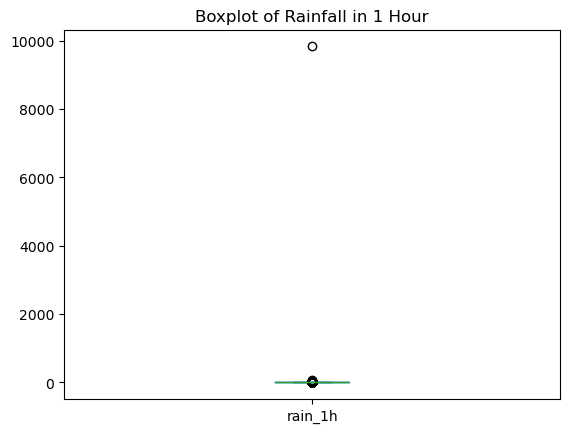

In [4]:
#Outliers
import matplotlib.pyplot as plt
data['rain_1h'].plot.box()
plt.title('Boxplot of Rainfall in 1 Hour')
plt.show()

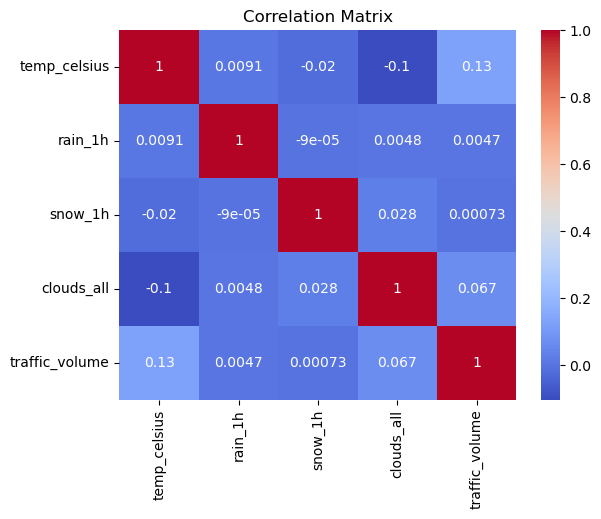

In [5]:
# Check how numerical features correlate with traffic_volume.
 
import seaborn as sns
corr_matrix = data[['temp_celsius', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

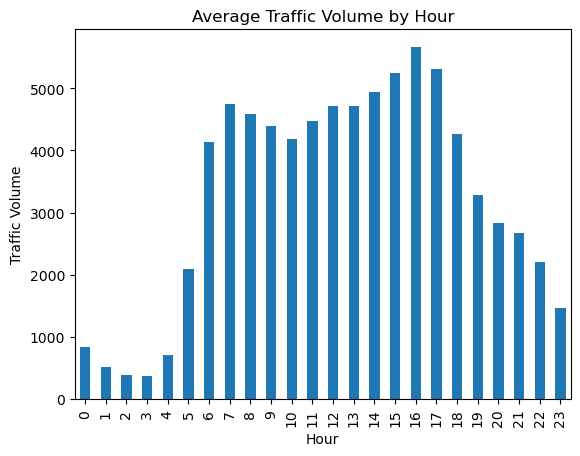

In [6]:
# Analyze how traffic_volume changes by hour or day.

data.groupby('hour')['traffic_volume'].mean().plot(kind='bar')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.show()

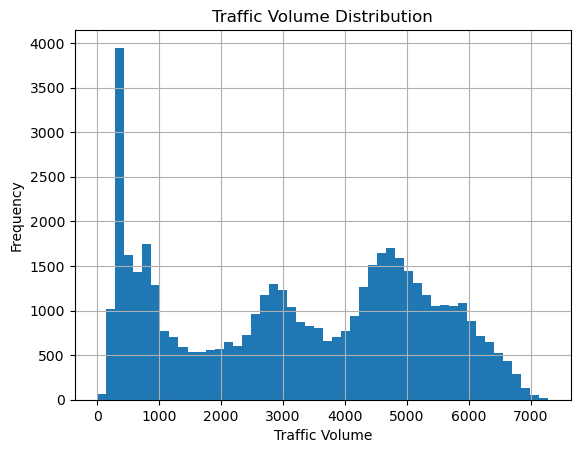

In [7]:
# Plot the distribution of traffic_volume.

data['traffic_volume'].hist(bins=50)
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  

# Predictions using Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
print("Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R^2:", r2_score(y_test, y_pred_lr))


Linear Regression Evaluation:
MAE: 1581.180420401227
R^2: 0.18406008762687087


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)  

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R^2:", r2_score(y_test, y_pred_rf))


Random Forest Evaluation:
MAE: 311.35148255863766
R^2: 0.9299578451199351


In [11]:
# Train the Random Forest model
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, "traffic_volume_model.pkl")
print("Traffic volume model saved.")


Traffic volume model saved.


In [12]:
# new data 
new_data = pd.DataFrame({
    'temp': [293.15, 285.15],       
    'rain_1h': [0.0, 1.5],          
    'clouds_all': [20, 80],         
    'hour': [8, 17],              
    'is_weekend': [0, 1]            
})

# Predict traffic volume
traffic_predictions = rf_model.predict(new_data)
print("Predicted Traffic Volume:", traffic_predictions)


Predicted Traffic Volume: [5668.21 4621.79]


In [13]:
# delivery data 
delivery_data = pd.DataFrame({
    'traffic_volume': traffic_predictions, 
    'distance': [10, 25],                  
    'rain_1h': [0.0, 1.5],                  
    'hour': [8, 17],                        
    'is_weekend': [0, 1]                   
})

# Define features (X) and target (y) for delivery time prediction
X_delivery = delivery_data[['traffic_volume', 'distance', 'rain_1h', 'hour', 'is_weekend']]
y_delivery = pd.Series([30, 60])  # delivery times (in minutes)
delivery_model = RandomForestRegressor(n_estimators=100, random_state=42)
delivery_model.fit(X_delivery, y_delivery)

# Save the model
joblib.dump(delivery_model, "delivery_time_model.pkl")
print("Delivery time model saved.")

# Predict delivery times using the trained model
delivery_time_predictions = delivery_model.predict(X_delivery)
delivery_data['predicted_delivery_time'] = delivery_time_predictions
print(delivery_data.round())

Delivery time model saved.
   traffic_volume  distance  rain_1h  hour  is_weekend  \
0          5668.0        10      0.0     8           0   
1          4622.0        25      2.0    17           1   

   predicted_delivery_time  
0                     37.0  
1                     52.0  
